## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/assignment3`

In [1]:
! git clone https://www.github.com/DS3001/assignment3

Cloning into 'assignment3'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 14 (delta 2), reused 1 (delta 1), pack-reused 7
Receiving objects: 100% (14/14), 868.21 KiB | 13.78 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [3]:
# 1. Load the car dataset

cars = pd.read_csv('./assignment3/data/car_data.csv')

In [4]:
# using head() and getting data dimensions
print(cars.shape)
cars.head()

(1000, 5)


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [5]:
#2. Summarizing variables
print(cars.describe())
cars['Gender'].unique()

           User ID          Age   AnnualSalary    Purchased
count  1000.000000  1000.000000    1000.000000  1000.000000
mean    500.500000    40.106000   72689.000000     0.402000
std     288.819436    10.707073   34488.341867     0.490547
min       1.000000    18.000000   15000.000000     0.000000
25%     250.750000    32.000000   46375.000000     0.000000
50%     500.500000    40.000000   72000.000000     0.000000
75%     750.250000    48.000000   90000.000000     1.000000
max    1000.000000    63.000000  152500.000000     1.000000


array(['Male', 'Female'], dtype=object)

> There doesn't appear to be any missing values in the dataset because there are the same number of observations for each variable and the only variable with a zero as the minimum value is the "Purchased" variable which is a dummy variable. Thus, the data appear to be relatively clean.

In [6]:
# Convert the Gender categorical variable into a dummy variable that takes the value 0 for male and 1 for female.
cars['g'] = cars['Gender']
cars['g'] = cars['g'].replace("Male", 0)
cars['g'] = cars['g'].replace("Female", 1)
cars['g'].value_counts()

1    516
0    484
Name: g, dtype: int64

In [7]:
#Create a matrix  X  of predictors including Age and AnnualSalary, and an outcome  y  equaling Purchase
X = cars.loc[:, ['Age', 'AnnualSalary']]
y = cars['Purchased']

In [8]:
# 3. MaxMin-normalize Age and AnnualSalary in X.

def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return z

#applying maxmin to Age and Salary
X = X.apply(maxmin)
X.describe()

,Age,AnnualSalary
count,1000.000000,1000.000000
mean,0.491244,0.419556
std,0.237935,0.250824
min,0.000000,0.000000
25%,0.311111,0.228182
50%,0.488889,0.414545
75%,0.666667,0.545455
max,1.000000,1.000000


In [9]:
# 4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=100)


[ 8 10 14]


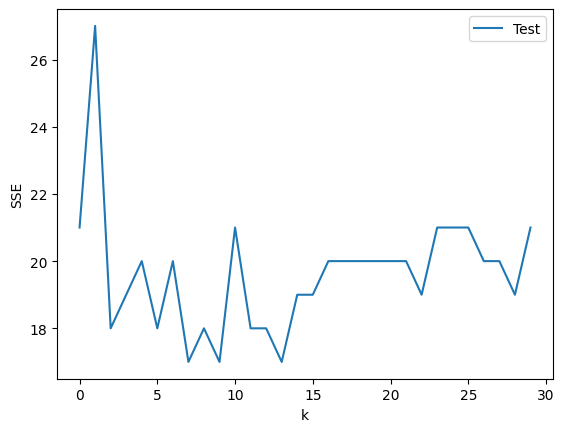

In [10]:
# 5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer,
# classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors  k  to use.
from sklearn.neighbors import KNeighborsClassifier as kNNClassifier
import matplotlib.pyplot as plt

k_bar = 30
k_grid = np.arange(1,k_bar)
SSE_test = np.zeros(k_bar)

#creating sklearn model for k
for k in range(k_bar):
  model = kNNClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train, y_train)
  y_hat = fitted_model.predict(X_test)
  SSE_test[k] = np.sum((y_test-y_hat)**2)


#finding the optimal value of k
SSE_min = np.min(SSE_test)
min_index = np.where(SSE_test == SSE_min)
k_star = k_grid[min_index]
print(k_star)

#plotting SSE to confirm k
plt.plot(np.arange(0,k_bar), SSE_test, label = 'Test')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc = 'upper right')

> Optimal k is 9 for this model because the SSE drops the most drastically around 9.

In [11]:
# 6.Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted
# outcomes against the actual outcomes; this is called a confusion matrix.

#fitting model
model = kNNClassifier(n_neighbors= 9)
fitted_model = model.fit(X_train, y_train)

#creating predictions
#x_hat = pd.DataFrame(X_test)
y_hat = fitted_model.predict(X_test)
#x_hat["Predicted_Purchase"] = y_hat

#creating crosstab of predicted and actual values
pd.crosstab(y_test, y_hat)


col_0,0,1
Purchased,,
0,104,15
1,3,78


How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?

> For most of the data, the correct values are predicted. There are 15 times when the data is predicted to be a 1 when it is really a 0 and there are only 3 cases where a 0 is predicted when it should have been a 1. However, this model is still accurately predicting for 91% of cases.

In [12]:
# 7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more
# accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

A = cars.loc[:, ["Age", "AnnualSalary", "g"]]
b = cars["Purchased"]
A_train, A_test, b_train, b_test = train_test_split(A,b, test_size=.2, random_state = 100)

model1 = kNNClassifier(n_neighbors = 9)
fitted_model1 = model.fit(A_train.drop("g", axis=1), y_train)
b_hat = fitted_model1.predict(A_test.drop('g', axis=1))

b_hat_M = b_hat[A_test['g'] == 0] #male predicted
b_hat_F = b_hat[A_test['g'] == 1] #female predicted
b_M = b_test[A_test['g'] == 0]
b_F = b_test[A_test['g'] == 1]

In [13]:
pd.crosstab(b_F, b_hat_F)

col_0,0,1
Purchased,,
0,58,9
1,5,33


In [14]:
pd.crosstab(b_M, b_hat_M)

col_0,0,1
Purchased,,
0,45,7
1,15,28


> This model predicts more accurately for women (0.87) while men are predicted correctly in only 77% of these cases. This difference in predicting abilities is not very large and thus doesn't seem very serious for the purposes of predicting car purchases.

**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

In [15]:
#1. load data and drop time from df
heart = pd.read_csv('./assignment3/data/heart_failure_clinical_records_dataset.csv')

In [16]:
heart.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [17]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [18]:
# dropping time from df
heart = heart.drop(axis=1, columns = ['time'])
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [19]:
#2. make a correlation matrix
corre_matrix = heart.corr()
corre_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


### What are variables are strongly correlated to death event?

> As with most human research none of the variables have a particularly strong correlation. However, age and creatinine level have a relatively strong positive correlation with death event, 0.2537 and 0.2942, respectively. Meaning that as these two variables increase, the likelihood of a patient dying also increases. Additionally, ejection fraction and sodium level are negatively correlated to death event, -0.2686 and -0.1952, respectively. Thus, indicating that patients with higher levels of sodium and a higher ejection fraction are more correlated to not dying.

In [80]:
#3. for anaemia, diabetes, high blood pressure, sex and smoking, compute a summary table of death event group by the variable

an = pd.crosstab(heart["DEATH_EVENT"],heart['anaemia'])
db = pd.crosstab(heart["DEATH_EVENT"], heart['diabetes'])
hbp = pd.crosstab(heart["DEATH_EVENT"], heart['high_blood_pressure'])
sx = pd.crosstab(heart["DEATH_EVENT"], heart['sex'])
smk = pd.crosstab(heart["DEATH_EVENT"], heart['smoking'])
print(an,'\n', '\n',db,'\n','\n', hbp,'\n','\n', sx,'\n','\n', smk)

anaemia        0   1
DEATH_EVENT         
0            120  83
1             50  46 
 
 diabetes       0   1
DEATH_EVENT         
0            118  85
1             56  40 
 
 high_blood_pressure    0   1
DEATH_EVENT                 
0                    137  66
1                     57  39 
 
 sex           0    1
DEATH_EVENT         
0            71  132
1            34   62 
 
 smoking        0   1
DEATH_EVENT         
0            137  66
1             66  30


> Sex is the only variable where being labeled as a 1 (male) has a higher proportion of dying than those who are labeled 0 (female). However, having anaemia is very similar to not having anaemia in regards to the likelihood of the patient dying.

In [89]:
#4. On the basis of your answers from 2 and 3, build a matrix  X  of the variables you think are
#most predictive of a death, and a variable  y  equal to DEATH_EVENT.
X = heart.drop(axis=1, columns=['DEATH_EVENT'])
y = heart['DEATH_EVENT']

In [90]:
#5 Maxmin normalize all of the variables in X.
def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return z

#applying maxmin to X
X = X.apply(maxmin)
X.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000
mean,0.378798,0.431438,0.071299,0.418060,0.364903,0.351171,0.288833,0.100436,0.675012,0.648829,0.32107
std,0.216269,0.496107,0.123793,0.494067,0.179316,0.478136,0.118565,0.116237,0.126071,0.478136,0.46767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.200000,0.000000,0.011929,0.000000,0.242424,0.000000,0.227179,0.044944,0.600000,0.000000,0.00000
50%,0.363636,0.000000,0.028961,0.000000,0.363636,0.000000,0.287186,0.067416,0.685714,1.000000,0.00000
75%,0.545455,1.000000,0.071319,1.000000,0.469697,1.000000,0.337495,0.101124,0.771429,1.000000,1.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [92]:
#6. Split the sample into ~80% for training and ~20% for evaluation.
 #(Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state =100)


In [101]:
#7. Determine the optimal number of neighbors for a  kNN regression for the variables you selected.
from sklearn.neighbors import KNeighborsRegressor as kNNRegression

#selecting wanted variables for first regression
A_train = X_train.loc[:, ['anaemia', 'sex', 'serum_sodium', 'age', 'serum_creatinine', 'ejection_fraction']]
A_test = X_test.loc[:, ['anaemia', 'sex', 'serum_sodium', 'age', 'serum_creatinine', 'ejection_fraction']]

k_bar = 30
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
  model = kNNRegression(n_neighbors = k+1)
  fitted_model = model.fit(A_train, y_train)
  y_hat = fitted_model.predict(A_test)
  SSE_test[k] = np.sum( (y_test-y_hat)**2)
  y_hat = fitted_model.predict(A_train)
  SSE_train[k] = np.sum((y_train-y_hat)**2)

SSE_min = np.min(SSE_test)
min_index = np.where(SSE_test == SSE_min)
k_star = k_grid[min_index]
print("Minimum SSE: ", SSE_min)
k_star


Minimum SSE:  12.6


array([5])

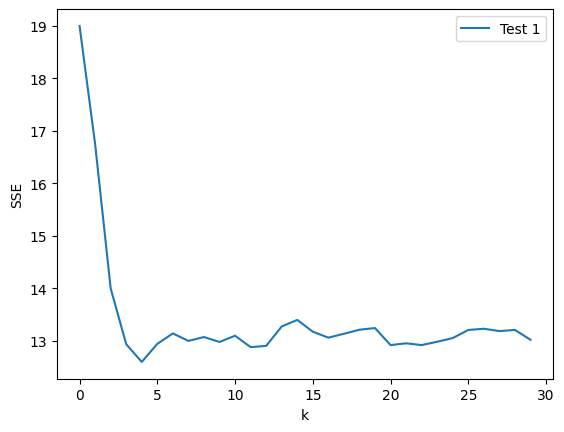

In [97]:
#plotting SSE for first regression
plt.plot(np.arange(0,k_bar), SSE_test, label = "Test 1")
plt.xlabel('k')
plt.ylabel("SSE")
plt.legend(loc="upper right")

In [102]:
#8. Repeat but with all of the variables
k_bar = 30
k_grid = np.arange(1,k_bar)
SSE_train = np.zeros(k_bar)
SSE_test = np.zeros(k_bar)
for k in range(k_bar):
  model = kNNRegression(n_neighbors = k+1)
  fitted_model = model.fit(X_train, y_train)
  y_hat = fitted_model.predict(X_test)
  SSE_test[k] = np.sum( (y_test-y_hat)**2)
  y_hat = fitted_model.predict(X_train)
  SSE_train[k] = np.sum((y_train-y_hat)**2)

SSE_min = np.min(SSE_test)
min_index = np.where(SSE_test == SSE_min)
k_star = k_grid[min_index]
print("Minimum SSE: ", SSE_min)
k_star

Minimum SSE:  11.56786703601108


array([19])

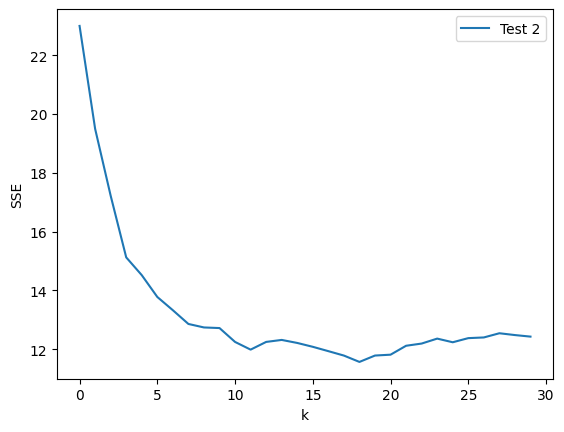

In [99]:
#plotting for regression with all variables
plt.plot(np.arange(0,k_bar), SSE_test, label = "Test 2")
plt.xlabel('k')
plt.ylabel("SSE")
plt.legend(loc="upper right")

### Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict DEATH_EVENTs? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

> The model with more variables in it has a lower Sum of Squared Error (11.57) whereas the model with the variables I selected has a Sum of Squared Error of 12.6. While this doesn't seem like a large difference, when it comes to medical data, this difference can be quite significant especially when trying to predict something as serious as a patient's death. I would say that the more variables are better for this situation because we are able to produce a more accurate model which can assist in making these significant predictions of someone's health.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [104]:
#1. Run the code below
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as kmc

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

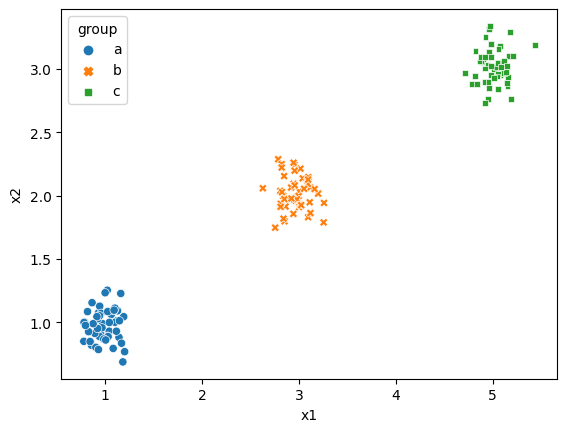

In [109]:
#2. Make scatterplots of the  (X1,X2)  points by group for each of the datasets.
sns.scatterplot(data = df0_125, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

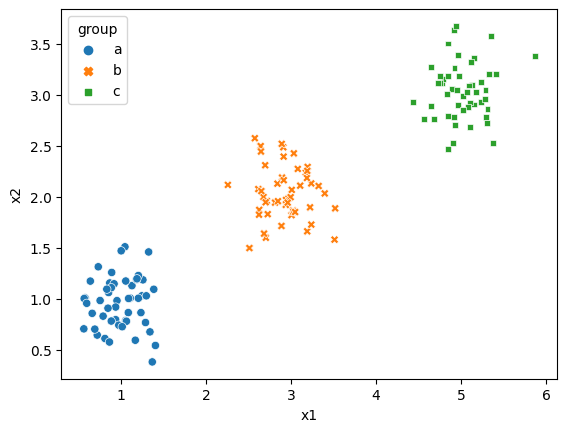

In [110]:
sns.scatterplot(data = df0_25, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

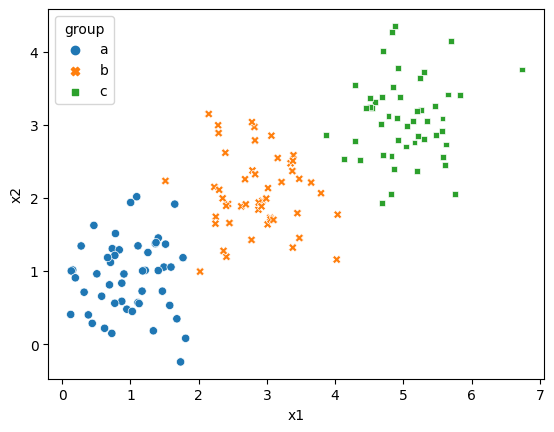

In [111]:
sns.scatterplot(data = df0_5, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

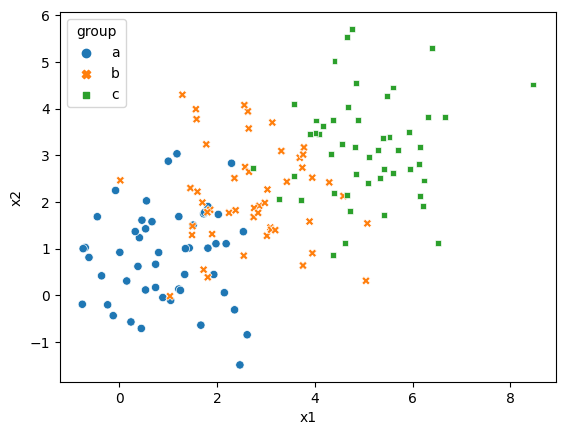

In [112]:
sns.scatterplot(data = df1_0, x = 'x1', y = 'x2', hue = 'group', style = 'group')

<Axes: xlabel='x1', ylabel='x2'>

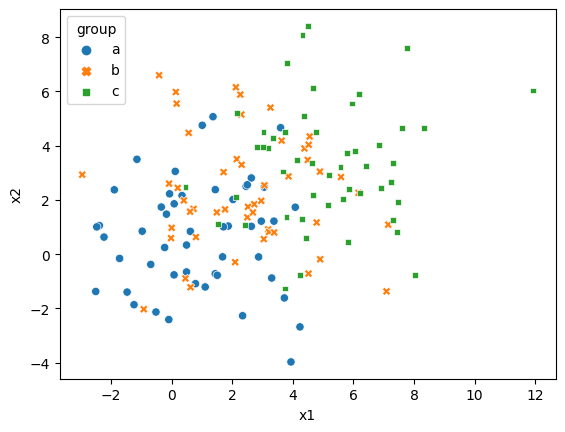

In [113]:
sns.scatterplot(data = df2_0, x = 'x1', y = 'x2', hue = 'group', style = 'group')

### As the noise goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

> As the noise increases the distinctness of the clusters reduces. When comparing the plots where the noise is 0.125 and 2, the clearly identifiable clusters in the first graph have melted together and it would be difficult to categorize the points into groups without having the different colors and shaped markers.

In [122]:
# 3. Create a scree plot for each of the datasets.
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x

def screeplots(df):
  X = df.loc[:, ['x1','x2']]
  X = X.apply(maxmin)
  k_bar = 10
  k_grid = np.arange(1,k_bar +1)
  SSE = np.zeros(k_bar)
  for k in range(k_bar):
    model = kmc(n_clusters=k+1, max_iter=300, n_init = 10, random_state=50)
    model = model.fit(X)
    SSE[k] = model.inertia_
  scree_plt = sns.lineplot(x=k_grid, y=SSE).set_title("Scree Plot")
  return scree_plt


Text(0.5, 1.0, 'Scree Plot')

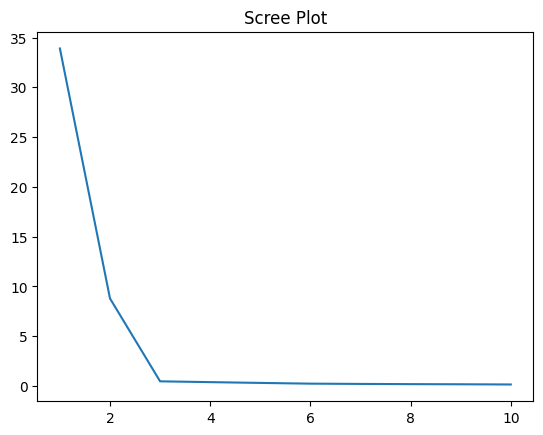

In [123]:
screeplots(df0_125)

> elbow at 3

Text(0.5, 1.0, 'Scree Plot')

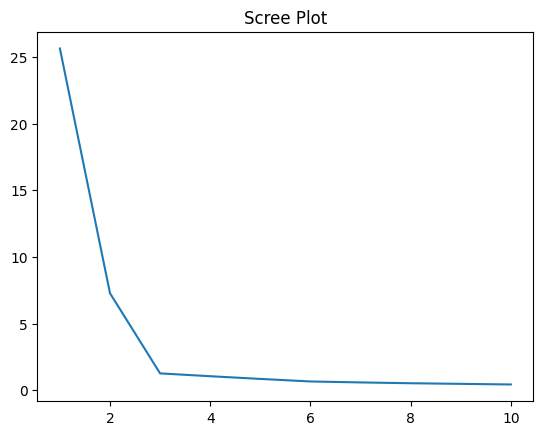

In [124]:
screeplots(df0_25)

> elbow at 3

Text(0.5, 1.0, 'Scree Plot')

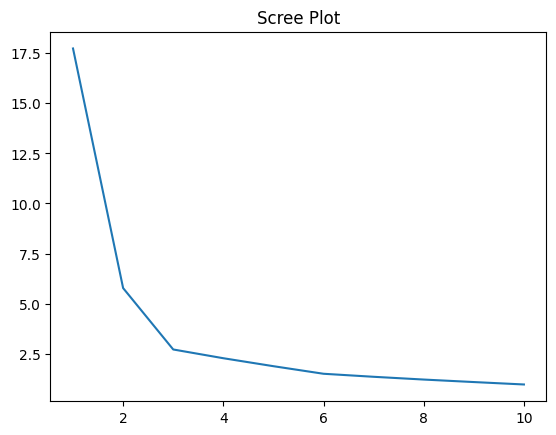

In [125]:
screeplots(df0_5)

> discernible elbow at 3

Text(0.5, 1.0, 'Scree Plot')

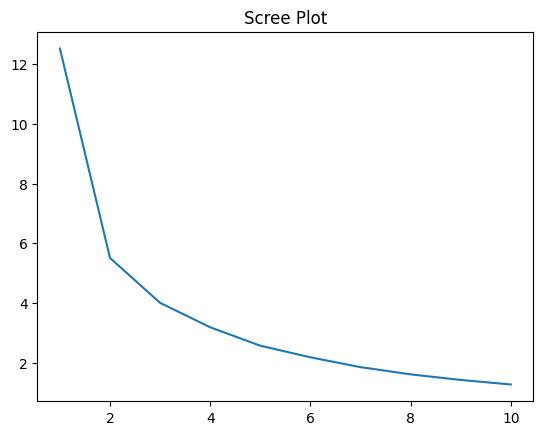

In [126]:
screeplots(df1_0)

> no distinct elbow

Text(0.5, 1.0, 'Scree Plot')

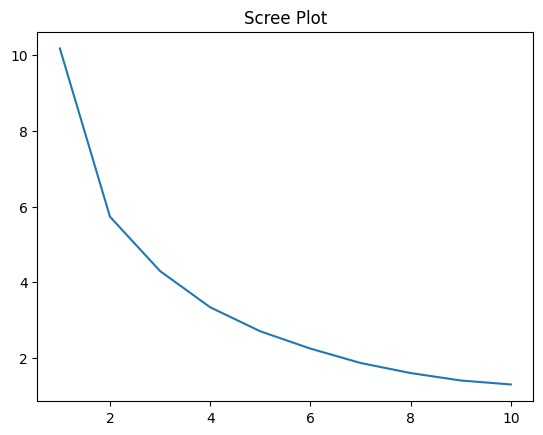

In [128]:
screeplots(df2_0)

> no distinct elbow

### Describe how the level of noise affects the scree plot and your ability to definitively select a k.

> As the noise level increases, there is a less noticeable elbow in the scree plot. Thus, with more noise, it would be more difficult to be confident in selecting a k.

### #4. Explain the intuition of the elbow, using this numerical simulation as an example.

> The elbow is used to show when the addition of another cluster to the model is the most beneficial and efficient. The SSE at the elbow as shown on the scree plot would, thus, not be significantly different if you were to choose a k that is greater than that at the elbow. In this numerical example the examples with limited noise showed a distinct elbow at around k=3. This means that having a k of 4 in those examples would not greatly change the SSE to be beneficial to the model's accuracy.

**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?